In [1]:
import mne
from MEG_Tools import MEG
from MEG_Tools import Graph
from MEG_Tools import timer
import matplotlib
import numpy as np
from scipy.stats import kurtosis
from scipy.special import entr
#matplotlib.use('Qt5Agg') #Allows Charts to pop-up and use interactive features
import matplotlib.pyplot as plt

In [2]:
meg = MEG('case_2225_with_spike_dipoles_sleep_2.mat')

Complete!                         


In [3]:
#Where are the spikes
print('Spikes:')
for spike in meg.spikes:
    print(round(spike['begin'],2), end=", ")

Spikes:
51.41, 51.53, 59.36, 59.47, 63.49, 69.77, 183.96, 201.56, 201.68, 211.5, 211.64, 211.76, 238.06, 238.19, 251.72, 266.13, 266.25, 266.37, 343.65, 345.04, 345.19, 402.52, 402.65, 402.78, 405.43, 416.3, 416.42, 417.1, 456.53, 456.65, 471.09, 471.2, 471.33, 504.8, 504.93, 

In [4]:


#Sensor Graph Class

class Sensor_Graph(Graph):#add reference to meg object
    def __init__(self, meg): #takes mne file
        super().__init__()  # Call the constructor of the parent class
        self.meg = meg
        self.mne = raw = meg.get_mne(use_cached=True) #we need the mne file
        #self.agg = MEG_Aggregate(meg.filename) #and aggregate
        #self.agg.filter_data()
        layout = mne.channels.find_layout(raw.info)
        xy_coords = layout.pos[:, :2]  # This will give you a 2D array of x and y coordinates
        sensor_names = raw.info['ch_names']
 
        for i, name in enumerate(sensor_names):
            if i < len(xy_coords):
                self.add_vertex(name,xy_coords[i][0],xy_coords[i][1],i)
        self.create_edges_based_on_distance(threshold = 0.1)

   


Using Cached File...
Opening raw data file case_2225_with_spike_dipoles_sleep_2.mat.raw.fif...
Isotrak not found
    Range : 0 ... 508999 =      0.000 ...   508.999 secs
Ready.
Reading 0 ... 508999  =      0.000 ...   508.999 secs...
Used Annotations descriptions: ['Spike']


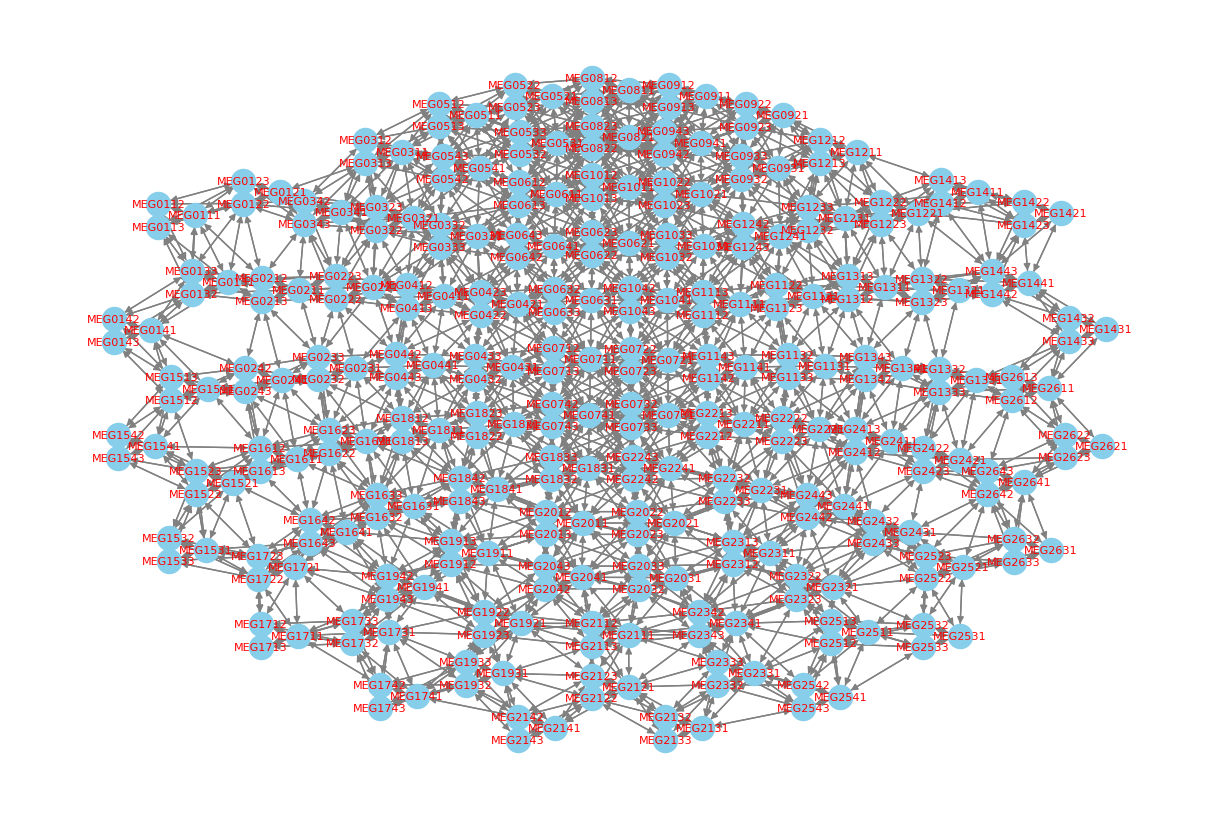

In [5]:
#Create Sensor viz
sg = Sensor_Graph(meg)

sg.draw_graph()